In [1]:
import re
from typing import List, Tuple

class NamedEntityDisambiguation:
    def __init__(self):
        self.mapping = {}

    def fit(self, data: List[Tuple[str, str]]):
        for raw_str, entity in data:
            words = re.split('/|-', raw_str)  # Split based on / or -
            for word in words:
                # Storing the mapping for each word, this can be enhanced further
                self.mapping[word] = entity
                # Storing a mapping for the plural form if not present
                if word + 's' not in self.mapping:
                    self.mapping[word + 's'] = entity

    def _handle_typos(self, word: str) -> str:
        # This is a naive way to handle typos
        # A better way might be to use fuzzy string matching
        for key in self.mapping.keys():
            if abs(len(word) - len(key)) <= 2:  # Let's say we allow 2 characters difference
                return key
        return word

    def predict(self, raw_str: str) -> str:
        words = re.split('/|-', raw_str)
        for word in words:
            corrected_word = self._handle_typos(word)
            if corrected_word in self.mapping:
                return self.mapping[corrected_word]
        return 'UNKNOWN'

# Sample training data
data = [('acrylic/standard', 'ACRYLIC'),
        ('acrylic', 'ACRYLIC'),
        ('cotton', 'COTTON'),
        ('linen - lin', 'LINEN'),
        ('linen', 'LINEN'),
        ('lin', 'LINEN'),
        ('cotton', 'COTTON'),
        ('algodon', 'COTTON'),
        ('sequin', 'SEQUIN'),
        ('sequins', 'SEQUIN'),
        ('acrylic', 'ACRYLIC')]

model = NamedEntityDisambiguation()
model.fit(data)

print(model.predict('cotton/standard'))  # Expected: COTTON
print(model.predict('coton - algodon'))   # Expected: COTTON
print(model.predict('cotn - algdn'))      # Expected: COTTON
print(model.predict('acrylics'))          # Expected: ACRYLIC


ACRYLIC
ACRYLIC
ACRYLIC
ACRYLIC


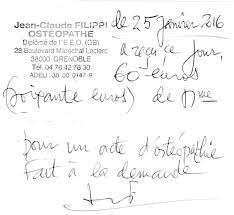

In [1]:
import pathlib
from PIL import Image

path = pathlib.Path('data/2.jpg')
img = Image.open(str(path))
img

In [3]:
import orc

ocr = orc.ocr.GCPVision()
output = ocr(content, key=path.name)

ImportError: dlopen(/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so, 0x0002): tried: '/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so' (no such file), '/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))

In [ ]:
output = ocr(content, key=invoice.name)

In [1]:
import zipfile
from tqdm import tqdm
import orc

ocr = orc.ocr.GCPVision()

with zipfile.ZipFile('data/invoices/files.zip') as z:
    for invoice in tqdm(list((zipfile.Path(z) / "files").iterdir())):
        if ocr.is_cached(invoice.name):
            continue
        content = invoice.read_bytes()
        ocr(content, key=invoice.name)

ImportError: dlopen(/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so, 0x0002): tried: '/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64')), '/System/Volumes/Preboot/Cryptexes/OS/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so' (no such file), '/Users/max/projects/orc/.venv/lib/python3.10/site-packages/grpc/_cython/cygrpc.cpython-310-darwin.so' (mach-o file, but is an incompatible architecture (have 'x86_64', need 'arm64'))